In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [246]:
# Import Polling Data Set
df = pd.read_csv('/Users/peter/DataSets/databeats-2016-us-presidential-election/presidential_polls_2016_fivethirtyeight.csv')

In [247]:
# Print first few rows of data set
df.head(3)

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
0,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/3/2016,11/6/2016,ABC News/Washington Post,A+,...,45.20163,41.72430,4.626221,NaN,NaN,https://www.washingtonpost.com/news/the-fix/wp...,48630,76192,11/7/16,09:35:33 8 Nov 2016
1,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/1/2016,11/7/2016,Google Consumer Surveys,B,...,43.34557,41.21439,5.175792,NaN,NaN,https://datastudio.google.com/u/0/#/org//repor...,48847,76443,11/7/16,09:35:33 8 Nov 2016
2,2016,President,polls-plus,Clinton vs. Trump vs. Johnson,11/8/16,U.S.,11/2/2016,11/6/2016,Ipsos,A-,...,42.02638,38.81620,6.844734,NaN,NaN,http://projects.fivethirtyeight.com/polls/2016...,48922,76636,11/8/16,09:35:33 8 Nov 2016


In [178]:
# Print last few rows of data set
df.tail(3)

,cycle,branch,type,matchup,forecastdate,state,startdate,enddate,pollster,grade,...,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,multiversions,url,poll_id,question_id,createddate,timestamp
12621,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/8/16,New York,8/7/2016,8/10/2016,Siena College,A,...,53.83622,32.47939,3.881193,NaN,NaN,https://www.siena.edu/assets/files/news/SNY081...,44852,68743,8/15/16,09:14:14 8 Nov 2016
12622,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/8/16,Virginia,9/30/2016,10/6/2016,Ipsos,A-,...,49.57558,39.96954,NaN,NaN,NaN,http://www.reuters.com/statesofthenation/,46675,72969,10/10/16,09:14:14 8 Nov 2016
12623,2016,President,polls-only,Clinton vs. Trump vs. Johnson,11/8/16,Wisconsin,6/9/2016,6/12/2016,Marquette University,A,...,46.40999,39.19839,NaN,NaN,NaN,https://law.marquette.edu/poll/2016/06/15/new-...,44341,66966,6/15/16,09:14:14 8 Nov 2016


In [179]:
# Print total row count of data set, start at 0
print("Total Rows:")
df.shape[0]

Total Rows:


12624

In [180]:
# Print column labels in data set
df.columns

Index(['cycle', 'branch', 'type', 'matchup', 'forecastdate', 'state',
       'startdate', 'enddate', 'pollster', 'grade', 'samplesize', 'population',
       'poll_wt', 'rawpoll_clinton', 'rawpoll_trump', 'rawpoll_johnson',
       'rawpoll_mcmullin', 'adjpoll_clinton', 'adjpoll_trump',
       'adjpoll_johnson', 'adjpoll_mcmullin', 'multiversions', 'url',
       'poll_id', 'question_id', 'createddate', 'timestamp'],
      dtype='object')

In [181]:
# Explanation of column labels

# cycle: The election cycle year, in this case, 2016.
# branch: The level or type of election, here it is for the "President."
# type: The type of forecast model used, such as "polls-plus."
# matchup: The candidates involved in the poll, e.g., "Clinton vs. Trump vs. Johnson."
# forecastdate: The date of the forecast, typically the date of the election, 11/8/16.
# state: The location of the poll, here it is for the entire "U.S."
# startdate: The starting date of the poll, 11/3/2016.
# enddate: The ending date of the poll, 11/6/2016.
# pollster: The organization conducting the poll, such as "ABC News/Washington Post."
# grade: The quality rating of the pollster, in this case, "A+."
# samplesize: The number of respondents in the poll, here it is 2220.
# population: The type of respondents, such as "lv" (likely voters).
# poll_wt: The weight given to this poll in the model, 8.720654.
# rawpoll_clinton: The raw percentage of respondents supporting Clinton, 47.
# rawpoll_trump: The raw percentage of respondents supporting Trump, 43.
# rawpoll_johnson: The raw percentage of respondents supporting Johnson, 4.
# rawpoll_mcmullin: The raw percentage of respondents supporting McMullin (not present in this poll).
# adjpoll_clinton: The adjusted percentage of respondents supporting Clinton, 45.20163.
# adjpoll_trump: The adjusted percentage of respondents supporting Trump, 41.7243.
# adjpoll_johnson: The adjusted percentage of respondents supporting Johnson, 4.626221.
# adjpoll_mcmullin: The adjusted percentage of respondents supporting McMullin (not present in this poll).
# multiversions: Indicates if there are multiple versions of the poll (empty in this case).
# url: The URL where the poll results can be found, e.g., "https://www.washingtonpost.com/news/the-fix/wp/2016/11/07/post-abc-tracking-poll-clinton-47-trump-43-on-election-eve/"
# poll_id: A unique identifier for the poll, 48630.
# question_id: A unique identifier for the specific question in the poll, 76192.
# createddate: The date the poll data was created, 11/7/16.
# timestamp: The timestamp of when the data was recorded, "09:35:33 8 Nov 2016."?

In [182]:
# Get unique values for population column 
population_values = df['population'].unique()
print("Population column values: ")
for value in population_values:
    print(value)

Population column values: 
lv
rv
a
v


In [183]:
# Explanation of populatino column values
# lv (likely voters):
# These are respondents who are determined to be likely to vote in the upcoming election. 
# Pollsters use various criteria, such as past voting behavior and expressed intention to vote, 
# to classify someone as a likely voter.

# rv (registered voters):
# These are respondents who are registered to vote. 
# This group includes all individuals who are registered, 
# regardless of their likelihood of actually casting a vote in the election.

# a (adults):
# This category includes all adult respondents,
#  regardless of their registration or likelihood to vote. 
# It is the broadest category and provides a general view of 
# public opinion among the adult population.

# v (voters):
# This usually refers to individuals who have voted in a past election 
# or are confirmed to have voted, based on official records or self-reporting. 
# This group can sometimes be used to validate poll predictions by 
# comparing with actual voter turnout.

# raw respondents: 
# refer to the initial, 
# unadjusted survey results directly from the respondents. 
# These numbers represent the straightforward, unmodified 
# percentages or counts of support for each candidate or 
# option based on the survey responses.

# Adjusted respondents: 
# are the results that have been modified to account for various factors that
#  might skew the raw data. Adjustments are made to better reflect 
# the likely actual outcomes by considering elements like 
# demographic weighting, past voting behavior, and correcting 
# for any known biases in the sample. This adjustment process 
# aims to make the poll more accurately representative of 
# the broader voting population.

In [184]:
# Get unique values from multiversions column to see if there are multiple versions for the pole
poll_version_values = df['multiversions'].unique()
print("Poll Multiversions: ")
for value in poll_version_values:
    print(value)
# no multiversions found

Poll Multiversions: 
nan
*


In [185]:
# Create a filtered data frame of only desired columns for analysis
filter_df = df[['pollster','grade', 'question_id', 'samplesize','state', 'poll_wt', 'adjpoll_trump', 'adjpoll_clinton']]

In [186]:
# Print first few rows of FILTERED data set
filter_df.head(3)

,pollster,grade,question_id,samplesize,state,poll_wt,adjpoll_trump,adjpoll_clinton
0,ABC News/Washington Post,A+,76192,2220.0,U.S.,8.720654,41.72430,45.20163
1,Google Consumer Surveys,B,76443,26574.0,U.S.,7.628472,41.21439,43.34557
2,Ipsos,A-,76636,2195.0,U.S.,6.424334,38.81620,42.02638


In [187]:
# Print last few rows of FILTERED data set
filter_df.tail(3)

,pollster,grade,question_id,samplesize,state,poll_wt,adjpoll_trump,adjpoll_clinton
12621,Siena College,A,68743,717.0,New York,0.0,32.47939,53.83622
12622,Ipsos,A-,72969,479.0,Virginia,0.0,39.96954,49.57558
12623,Marquette University,A,66966,666.0,Wisconsin,0.0,39.19839,46.40999


In [188]:
# Get unique values from grade column
grade_values = df['grade'].unique()
print("Pollster grades: ")
for value in grade_values:
    print(value)

Pollster grades: 
A+
B
A-
B-
A
nan
B+
C+
C-
C
D


In [189]:
# The pollster’s methodology can significantly influence the weight assigned to poll responses. 
# Here's a breakdown of how various factors, including certain states, 
# colleges, and the pollster’s approach, affect polling weights:

# 1. Pollster’s Methodology
# Sampling Methods: Pollsters use various sampling techniques 
# (e.g., random sampling, stratified sampling). 
# The method affects how representative the sample is of the population. 
# For instance, if a pollster uses a stratified sample to ensure representation
#  from different demographic groups, weights might be adjusted to correct 
# for any over- or under-representation in the collected data.

# Survey Design: The design of the survey (e.g., questions asked, response options) 
# can influence how responses are weighted. 
# Pollsters might use different weighting schemes based on the design to 
# correct for any biases introduced by the survey questions or methodology.

# 2. Geographic Factors
# State Differences: In the U.S., political opinions and voter behavior can 
# vary significantly from state to state. Pollsters may apply different 
# weights based on state demographics to ensure the sample accurately reflects 
# the political landscape of each state. For instance, if a poll oversamples 
# responses from a heavily Democratic state, it may weight responses from 
# Republican-leaning states more heavily to balance the results.

# Regional Weighting: Pollsters might use regional weights to account for 
# differences in voter behavior and demographics across regions. This helps in 
# achieving a more accurate representation of national opinions.

#  3. Demographic Factors
# College vs. General Population: If a poll includes respondents from specific 
# colleges or universities, the weights may be adjusted to reflect the broader population. 
# College students might have different political views compared to the general public, 
# so their responses might be weighted to align with the overall demographic profile 
# of the population.

# Age, Gender, and Income: Pollsters often weight responses based on demographic 
# factors such as age, gender, income, and education to ensure that the sample reflects 
# the population’s demographic structure.

#  4. Pollster’s Credibility and Bias
# Historical Accuracy: Pollsters with a track record of accuracy might have their 
# weights adjusted less frequently, whereas newer or less established pollsters 
# might apply more significant adjustments.
# Bias Correction: Pollsters aim to minimize bias in their samples. 
# If a pollster’s sample is skewed toward a particular demographic or political leaning, 
# they will adjust weights to counteract this bias and ensure the final results
#  are more representative.

# Example Scenario
# State-Level Adjustment: Suppose a national poll is conducted, 
# and it ends up with an overrepresentation of responses from California. 
# Since California leans heavily Democratic, the poll might show a higher support 
# for Democratic candidates than is accurate for the nation as a whole. 
# To correct this, the pollster might apply higher weights to responses from states 
# with different political leanings (e.g., Texas or Florida) to balance the national picture.

# College Adjustment: If a poll is conducted on a college campus and 
# finds significant support for a candidate among students, this support might
#  be overrepresented compared to the general population. The pollster might apply 
# weights to lower the influence of these responses, ensuring that the final poll 
# results better reflect the views of the broader electorate.
# Summary

# The weight assigned to poll responses is a crucial step in making sure that 
# the final poll results are representative of the entire population. 
# The pollster’s methodology, including their sampling approach, geographic focus, 
# demographic considerations, and efforts to correct biases, all play a role 
# in determining how these weights are applied.

In [223]:
# Conditions to filter data further
# Filter our rows with no grade value
# Filter out rows where sample size is less than 10
# Filter out rows where poll weight is not 0 or less than .5
filtered_df = final_filtered_df[final_filtered_df['state'] != 'U.S.']
condition1= pd.isna(filter_df['grade'])
condition2= filter_df['samplesize'] < 1
# condition3= (filter_df['poll_wt'] != 0 ) | (filter_df['poll_wt'] < 0.1)

# Combine the conditions
combined_condition = condition1 | condition2

In [224]:
# FINAL filtered data frame
final_filtered_df = filter_df[~combined_condition]
print("Final filtered rows:")
print(final_filtered_df.shape)
final_filtered_df.tail()


Final filtered rows:
(11337, 8)


,pollster,grade,question_id,samplesize,state,poll_wt,adjpoll_trump,adjpoll_clinton
12619,University of New Hampshire,B+,68189,469.0,New Hampshire,0.0,43.04717,40.24983
12620,Ipsos,A-,75560,653.0,Wisconsin,0.0,38.96884,46.54218
12621,Siena College,A,68743,717.0,New York,0.0,32.47939,53.83622
12622,Ipsos,A-,72969,479.0,Virginia,0.0,39.96954,49.57558
12623,Marquette University,A,66966,666.0,Wisconsin,0.0,39.19839,46.40999


In [225]:
# Print max value of sample size
print("Max sample size:")
int(final_filtered_df['samplesize'].max())

Max sample size:


84292

In [193]:
# Print min value of sample size
print("Min sample size:")
int(final_filtered_df['samplesize'].min())

Min sample size:


35

In [226]:
# Too many questions polled to plot
pollster_questions = df['question_id'].unique()
print("Pollster questions: ")
for value in pollster_questions:
    print(value, (final_filtered_df['question_id'] == value).sum())

Pollster questions: 
76192 3
76443 3
76636 3
76262 3
76444 3
76163 3
76058 3
75974 3
76158 0
76611 3
76036 3
76181 3
76176 3
75743 3
75818 3
75957 3
76354 0
75264 3
76066 3
76068 3
76060 3
76062 3
74934 3
76612 0
76448 3
76451 3
76029 3
76450 3
76453 3
75977 3
76000 0
76449 3
75741 3
75699 3
76001 0
75999 0
76034 3
75997 0
75998 0
76245 3
75343 3
76055 3
76447 3
76159 3
75995 0
75702 3
75968 0
76246 3
76269 3
76446 3
75978 3
76043 3
76170 3
76052 3
76013 3
76169 3
74519 3
74252 3
75391 3
76157 3
75994 0
75969 3
75996 0
76452 3
75509 3
76171 3
76454 3
75831 3
76355 3
75703 3
75803 3
75507 3
75087 3
76559 3
75508 3
75458 0
75456 0
76247 3
75739 3
76257 3
75478 3
76583 3
76593 3
76572 3
76356 3
76054 3
76601 0
76585 3
76588 3
75243 3
76555 3
76358 3
76554 3
75239 3
76552 3
76353 3
75231 3
75700 3
76560 3
76258 3
75235 3
75084 3
75794 3
76599 3
76596 3
76359 3
76582 3
75083 3
76357 3
76179 3
74766 3
74761 3
75993 3
74770 3
76563 3
75594 3
76191 3
76565 3
76564 3
76590 3
74257 3
74345 3
757

In [229]:
# Sort FINAL filtered data for visualization
final_filtered_df = final_filtered_df.sort_values(by='samplesize', ascending=False)

In [230]:
# Define colors for grades of pollsters
grade_palette = {
    'A+': 'green',
    'A': 'lightgreen',
    'A-': 'darkgreen',
    'B+': 'blue',
    'B': 'lightblue',
    'B-': 'darkblue',
    'C+': 'orange',
    'C': 'yellow',
    'C-': 'darkorange',
    'D': 'red',
    'nan': 'grey'  # For missing values
}

In [231]:
# Print max value Hillary
print("For Hillary")
int(final_filtered_df['adjpoll_clinton'].max())

For Hillary


86

In [232]:
# Print max value Trump
print("For Trump")
int(final_filtered_df['adjpoll_trump'].max())

For Trump


72

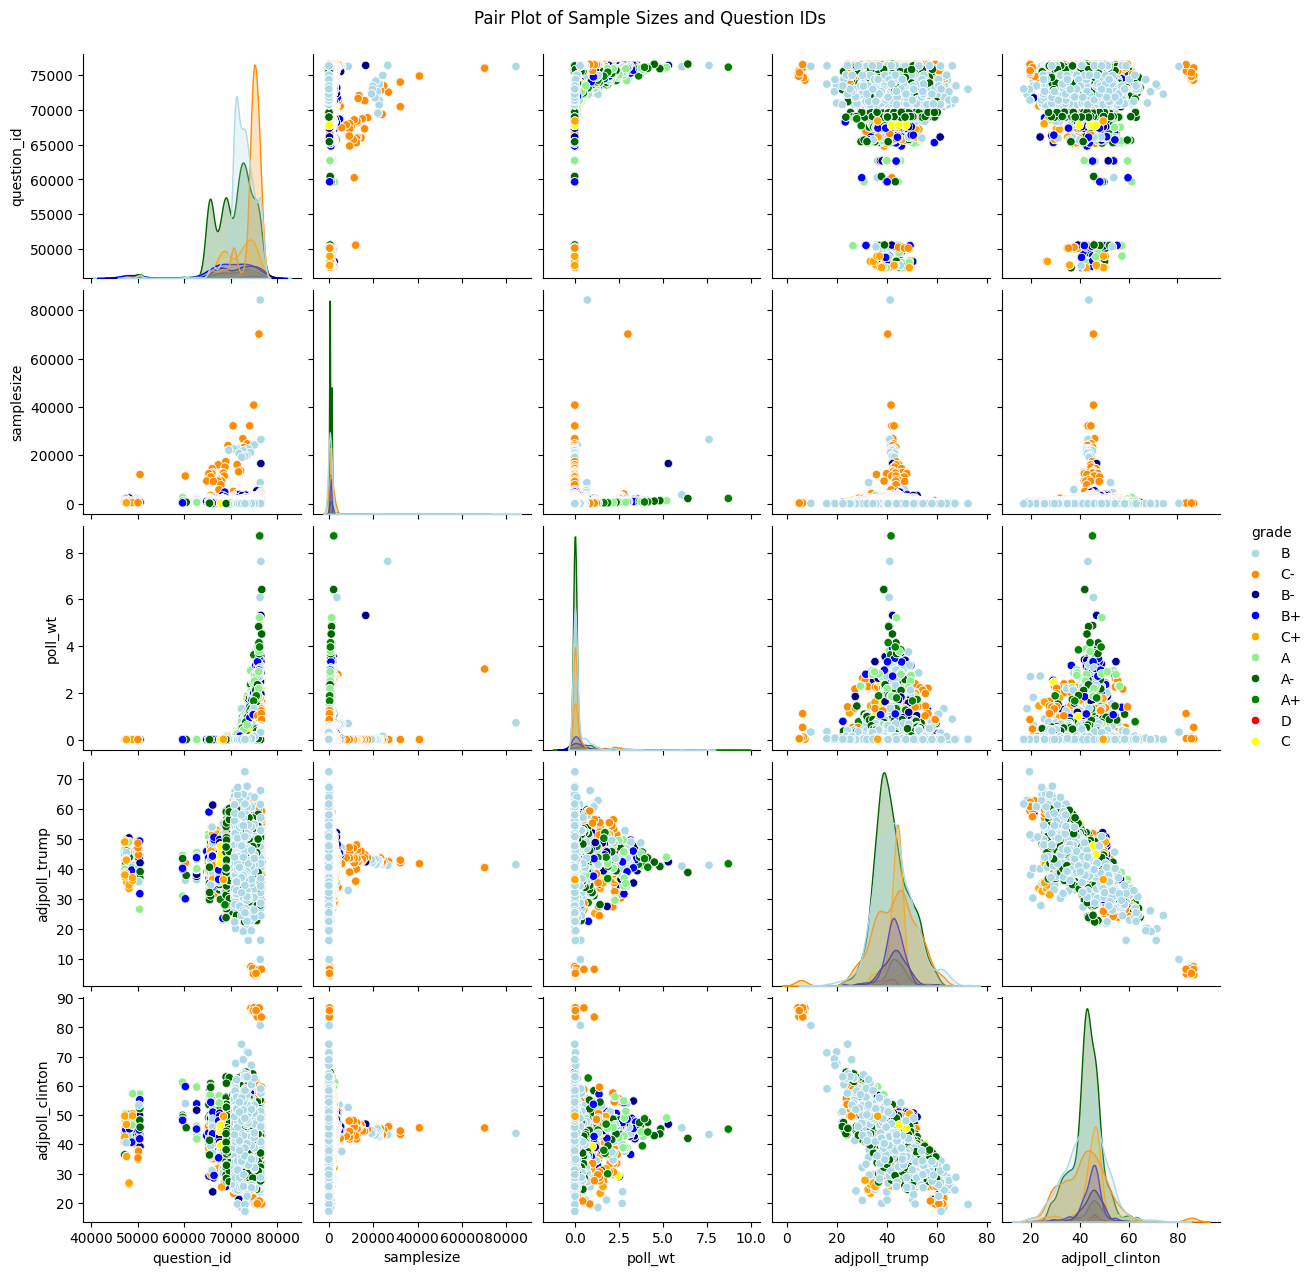

In [233]:
# Create a pair plot with hue based on grades and custom color palette
sns.pairplot(final_filtered_df, diag_kind='kde', hue='grade', palette=grade_palette, markers='o')

# Customize the plot
plt.suptitle('Pair Plot of Sample Sizes and Question IDs', y=1.02)  # Adjust title and spacing

plt.show()

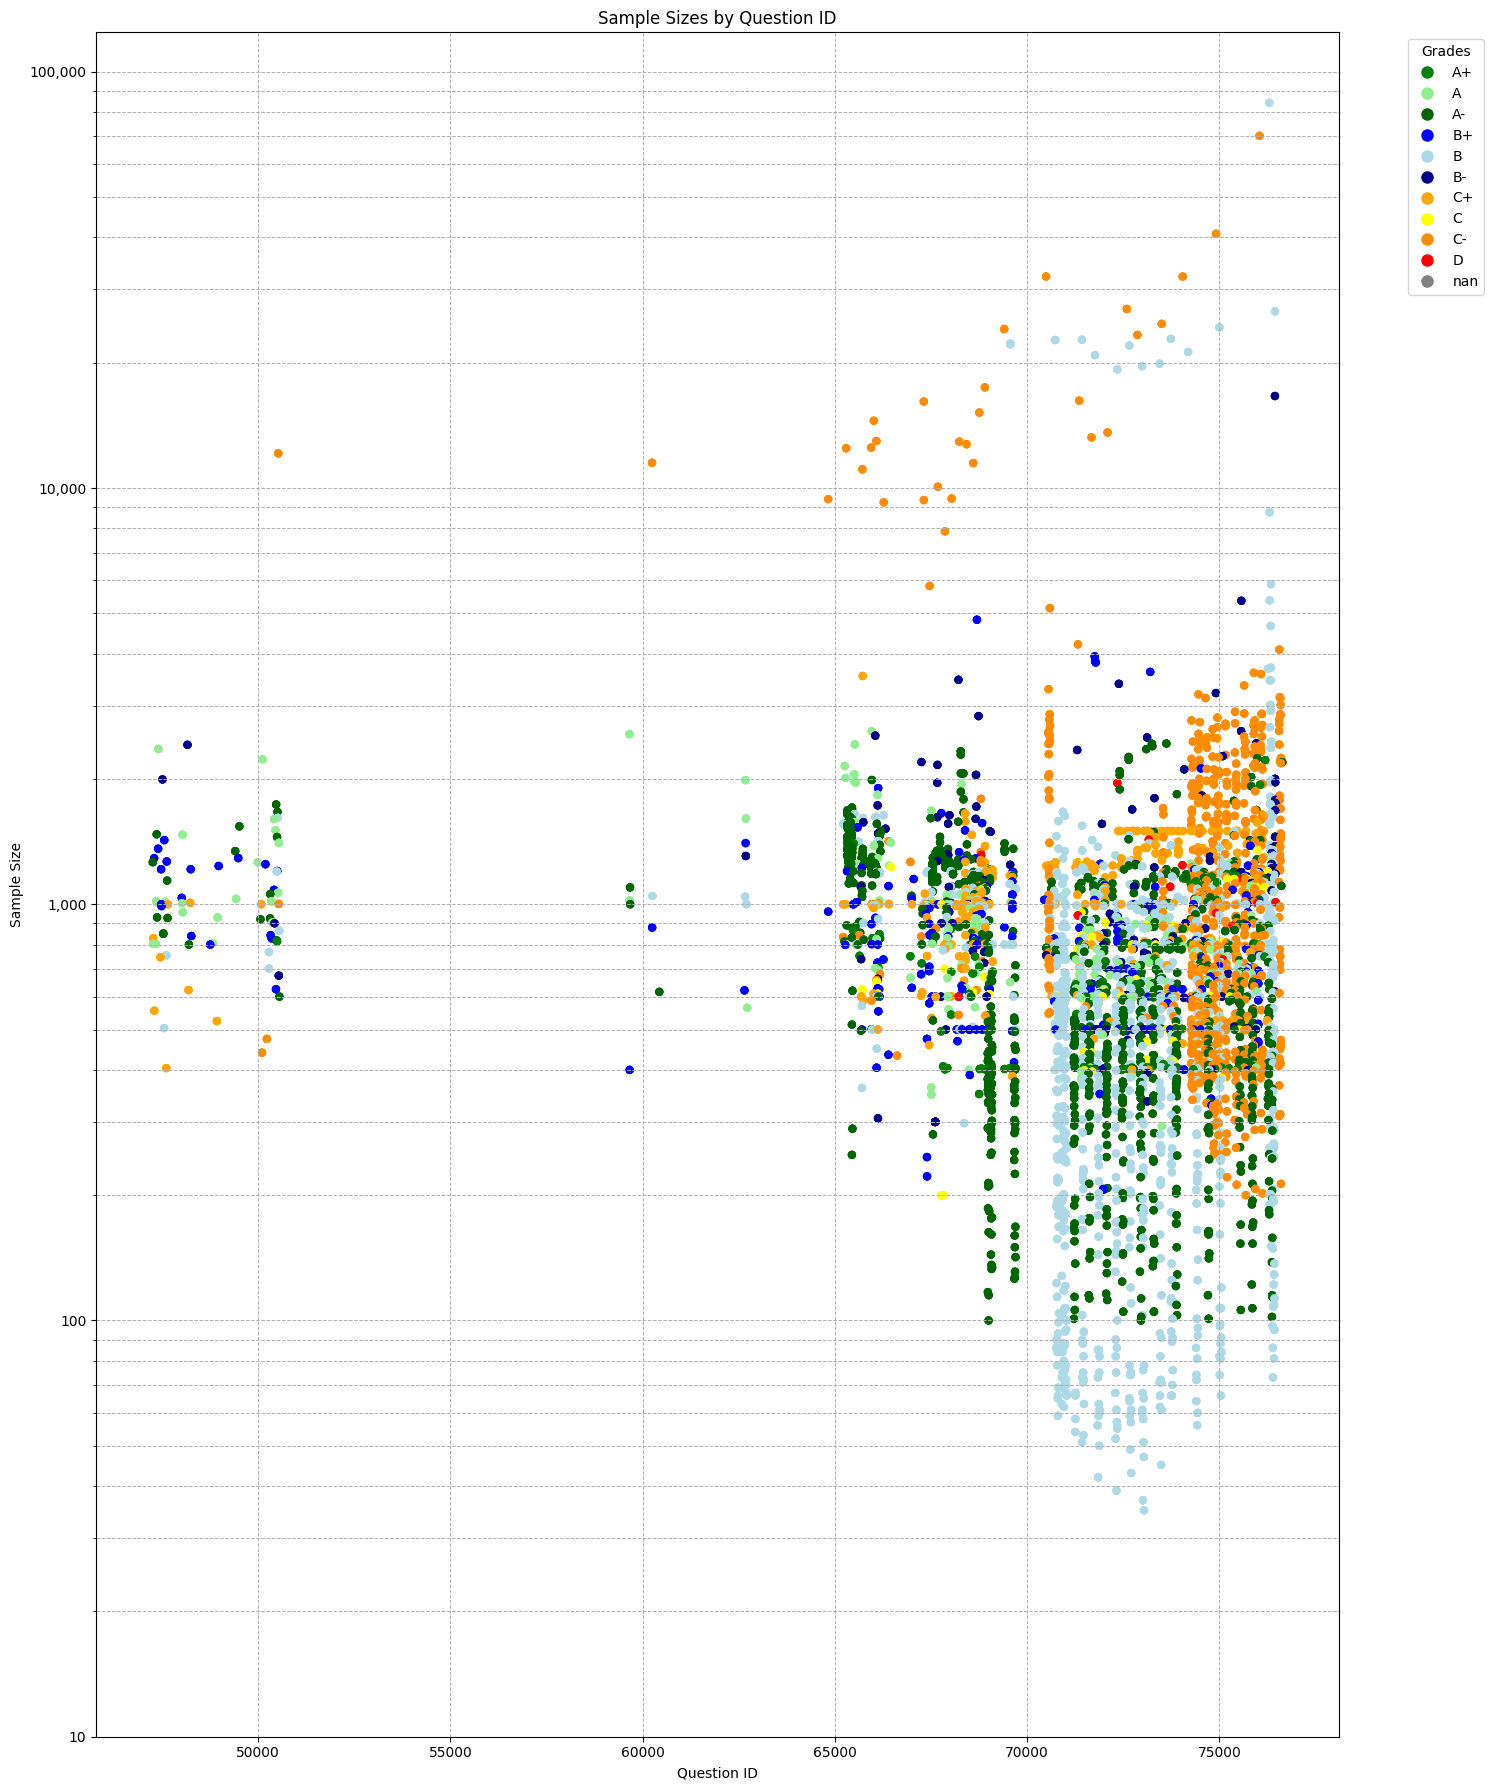

In [234]:
# Plotting the scatter plot with logarithmic scale on the y-axis and color based on grades
plt.figure(figsize=(15, 18))  # Adjust the figure size as needed
scatter = plt.scatter(final_filtered_df['question_id'], final_filtered_df['samplesize'], 
                      c=final_filtered_df['grade'].map(grade_palette), alpha=1, edgecolor='none')

# Add a legend to indicate the grades
# Create a custom legend using handles and labels
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=grade_palette[grade], markersize=10) for grade in grade_palette]
labels = list(grade_palette.keys())
plt.legend(handles, labels, title="Grades", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Sample Sizes by Question ID')
plt.xlabel('Question ID')
plt.ylabel('Sample Size')
plt.yscale('log')  # Use logarithmic scale for y-axis

# Customize y-axis ticks and labels
plt.yticks([10, 100, 1000, 10000, 100000], 
           ['10', '100', '1,000', '10,000', '100,000'])

plt.grid(True, which='both', linestyle='--', linewidth=0.7)  # Grid lines for both major and minor ticks
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

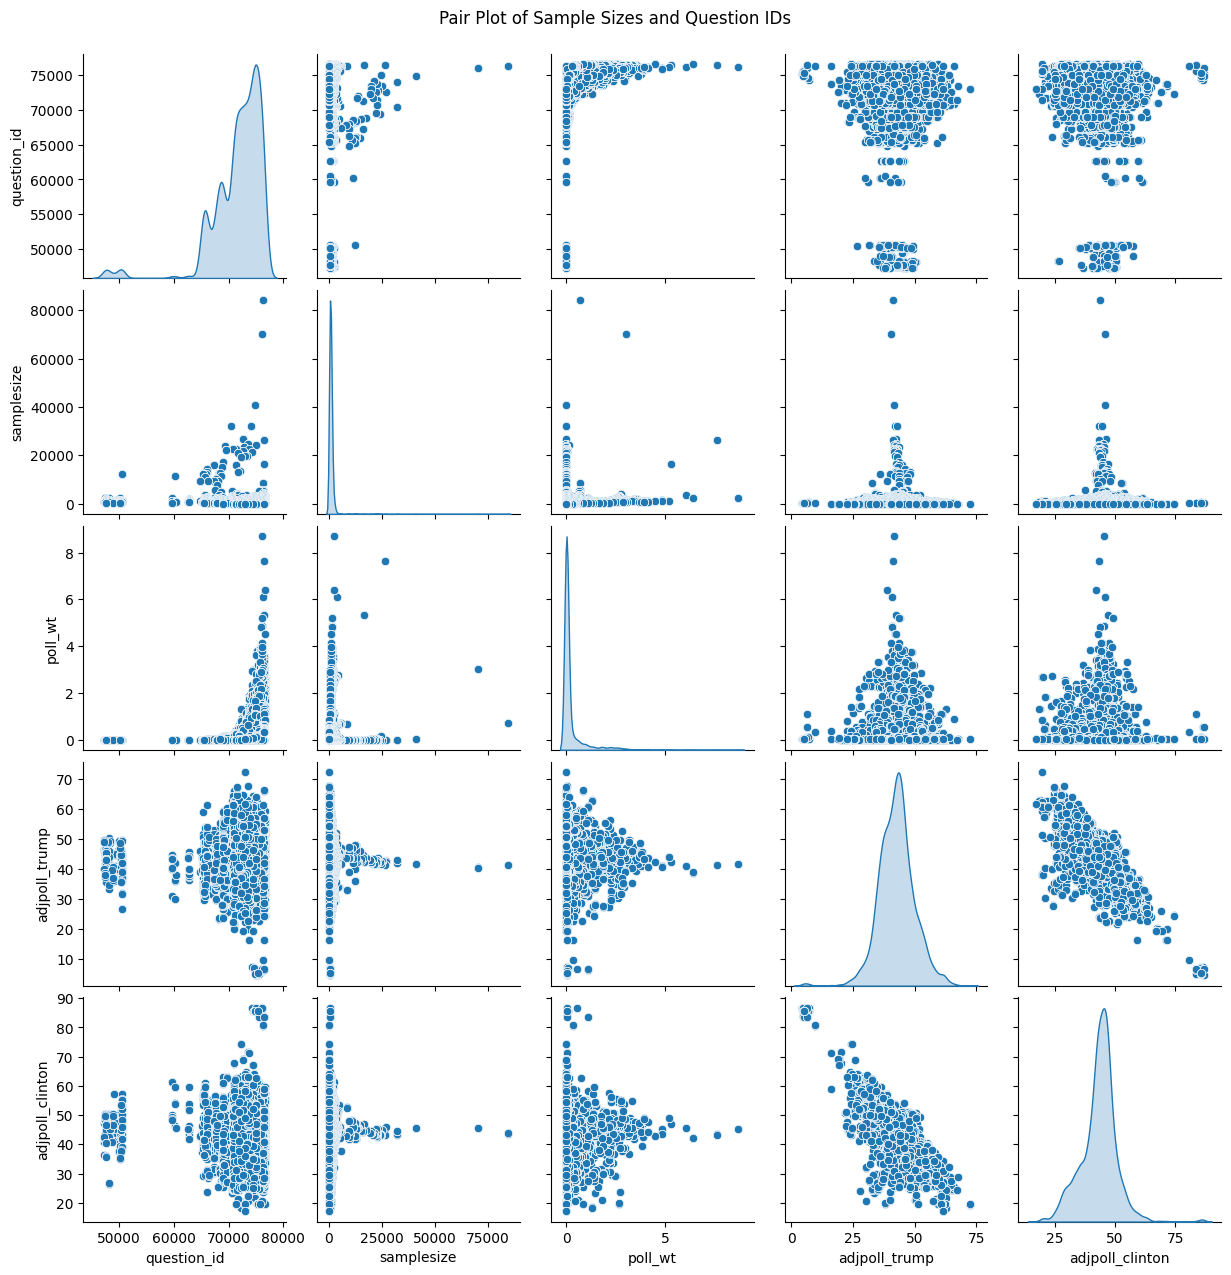

In [235]:
# Create a pair plot
sns.pairplot(final_filtered_df, diag_kind='kde', markers='o')

# Customize the plot
plt.suptitle('Pair Plot of Sample Sizes and Question IDs', y=1.02)  # Adjust title and spacing

plt.show()


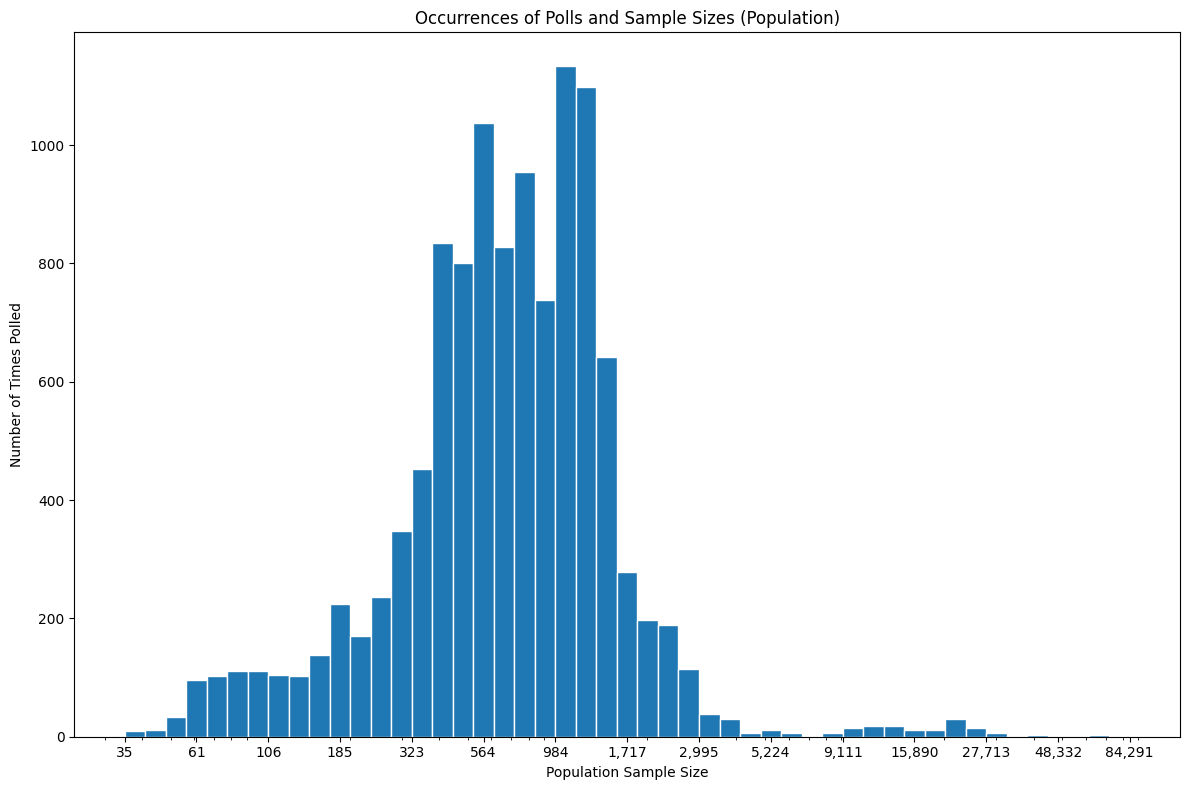

In [236]:
# Plot the number of samples and how many times sampled
# Calculate bins with logarithmic scale
bins = np.logspace(np.log10(final_filtered_df['samplesize'].min()), np.log10(final_filtered_df['samplesize'].max()), num=50)

# Plot histogram with custom bins
plt.figure(figsize=(12, 8))
plt.hist(final_filtered_df['samplesize'], bins=bins, edgecolor='white')
plt.title('Occurrences of Polls and Sample Sizes (Population)')
plt.xlabel('Population Sample Size')
plt.ylabel('Number of Times Polled')

# Customize X-axis labels with additional ticks
ticks = np.logspace(np.log10(final_filtered_df['samplesize'].min()), np.log10(final_filtered_df['samplesize'].max()), num=15)  # More ticks
plt.xscale('log')  # Use logarithmic scale for x-axis
plt.xticks(ticks=ticks, labels=[f'{int(tick):,}' for tick in ticks])

plt.tight_layout()  # Adjust layout to fit labels
plt.show()

/var/folders/5q/z1l12s4n7y1bxgmlhw1vkr7c0000gp/T/ipykernel_56963/2759709250.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_aggregated = df.groupby('size_bin').agg({


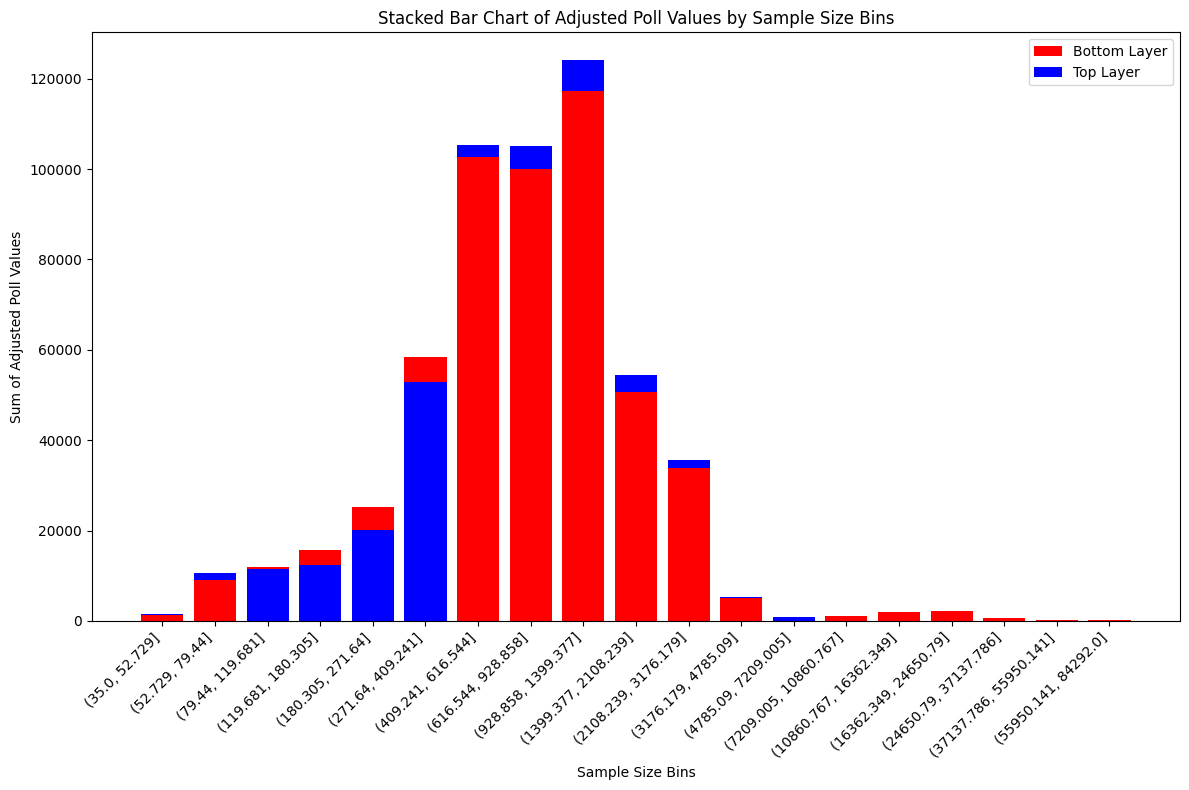

In [237]:
# Calculate bins with logarithmic scale
bins = np.logspace(np.log10(df['samplesize'].min()), np.log10(df['samplesize'].max()), num=20)

# Bin the samplesize into logarithmic bins
df['size_bin'] = pd.cut(df['samplesize'], bins=bins)

# Aggregate data by bins
bin_aggregated = df.groupby('size_bin').agg({
    'samplesize': 'count',  # Number of samples in each bin
    'adjpoll_trump': 'sum',  # Sum of adjpoll_trump values
    'adjpoll_clinton': 'sum'  # Sum of adjpoll_clinton values
}).reset_index()

# Prepare data for plotting
bin_aggregated['bottom'] = np.minimum(bin_aggregated['adjpoll_trump'], bin_aggregated['adjpoll_clinton'])
bin_aggregated['top'] = np.maximum(bin_aggregated['adjpoll_trump'], bin_aggregated['adjpoll_clinton'])
bin_aggregated['bottom_color'] = np.where(bin_aggregated['adjpoll_trump'] < bin_aggregated['adjpoll_clinton'], 'red', 'blue')
bin_aggregated['top_color'] = np.where(bin_aggregated['adjpoll_trump'] < bin_aggregated['adjpoll_clinton'], 'blue', 'red')

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Plot the bottom part of the bars
plt.bar(bin_aggregated['size_bin'].astype(str), bin_aggregated['bottom'], color=bin_aggregated['bottom_color'], label='Bottom Layer')

# Plot the top part of the bars
plt.bar(bin_aggregated['size_bin'].astype(str), bin_aggregated['top'] - bin_aggregated['bottom'], 
        bottom=bin_aggregated['bottom'], color=bin_aggregated['top_color'], label='Top Layer')

# Add labels and title
plt.xlabel('Sample Size Bins')
plt.ylabel('Sum of Adjusted Poll Values')
plt.title('Stacked Bar Chart of Adjusted Poll Values by Sample Size Bins')

# Add a legend to indicate the data series
plt.legend()

# Customize the X-axis with logarithmic scale
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

plt.show()

/var/folders/5q/z1l12s4n7y1bxgmlhw1vkr7c0000gp/T/ipykernel_56963/166441354.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_aggregated = df.groupby('size_bin').agg({


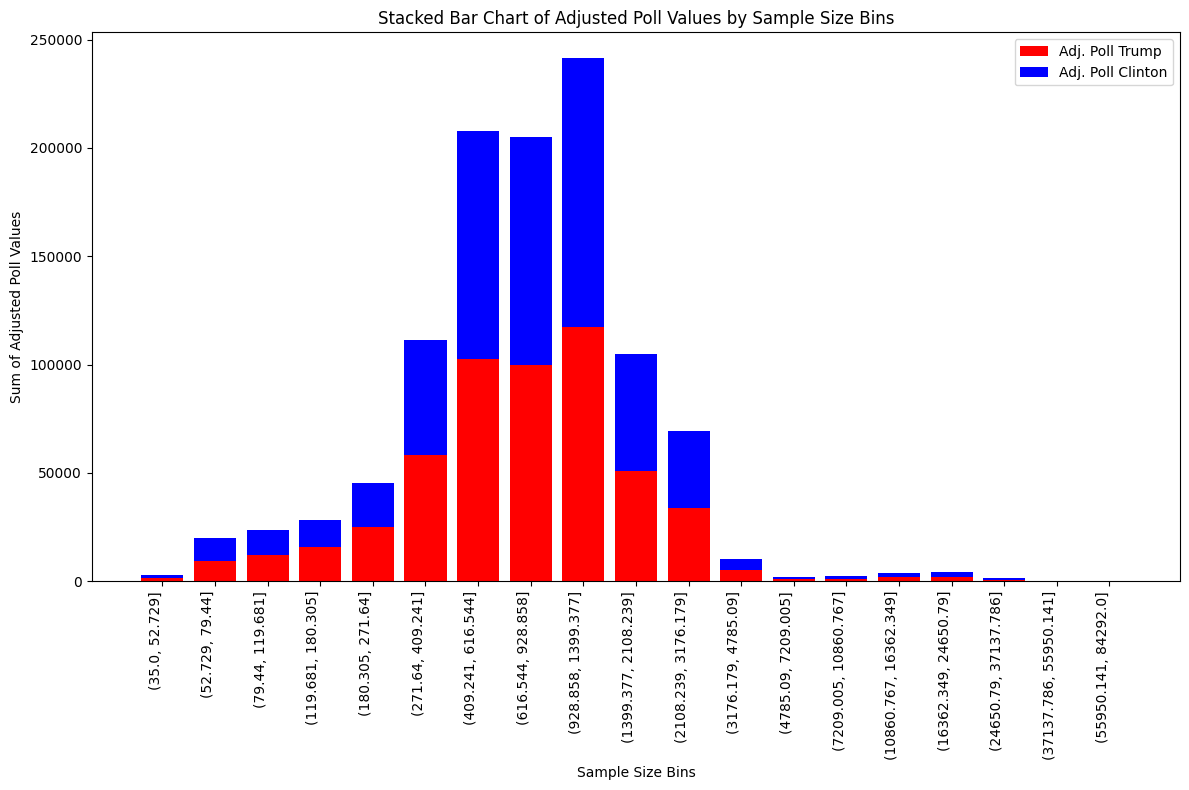

In [205]:
# Calculate bins with logarithmic scale
bins = np.logspace(np.log10(df['samplesize'].min()), np.log10(df['samplesize'].max()), num=20)

# Bin the samplesize into logarithmic bins
df['size_bin'] = pd.cut(df['samplesize'], bins=bins)

# Aggregate data by bins
bin_aggregated = df.groupby('size_bin').agg({
    'samplesize': 'count',  # Number of samples in each bin
    'adjpoll_trump': 'sum',  # Sum of adjpoll_trump values
    'adjpoll_clinton': 'sum'  # Sum of adjpoll_clinton values
}).reset_index()

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed

# Stacked bar for adjpoll_trump and adjpoll_clinton
plt.bar(bin_aggregated['size_bin'].astype(str), bin_aggregated['adjpoll_trump'], color='red', label='Adj. Poll Trump')
plt.bar(bin_aggregated['size_bin'].astype(str), bin_aggregated['adjpoll_clinton'], 
        bottom=bin_aggregated['adjpoll_trump'], color='blue', label='Adj. Poll Clinton')

# Add labels and title
plt.xlabel('Sample Size Bins')
plt.ylabel('Sum of Adjusted Poll Values')
plt.title('Stacked Bar Chart of Adjusted Poll Values by Sample Size Bins')

# Add a legend to indicate the data series
plt.legend()

# Customize the X-axis with logarithmic scale
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

plt.show()


/var/folders/5q/z1l12s4n7y1bxgmlhw1vkr7c0000gp/T/ipykernel_56963/3305176454.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_aggregated = df.groupby('size_bin').agg({


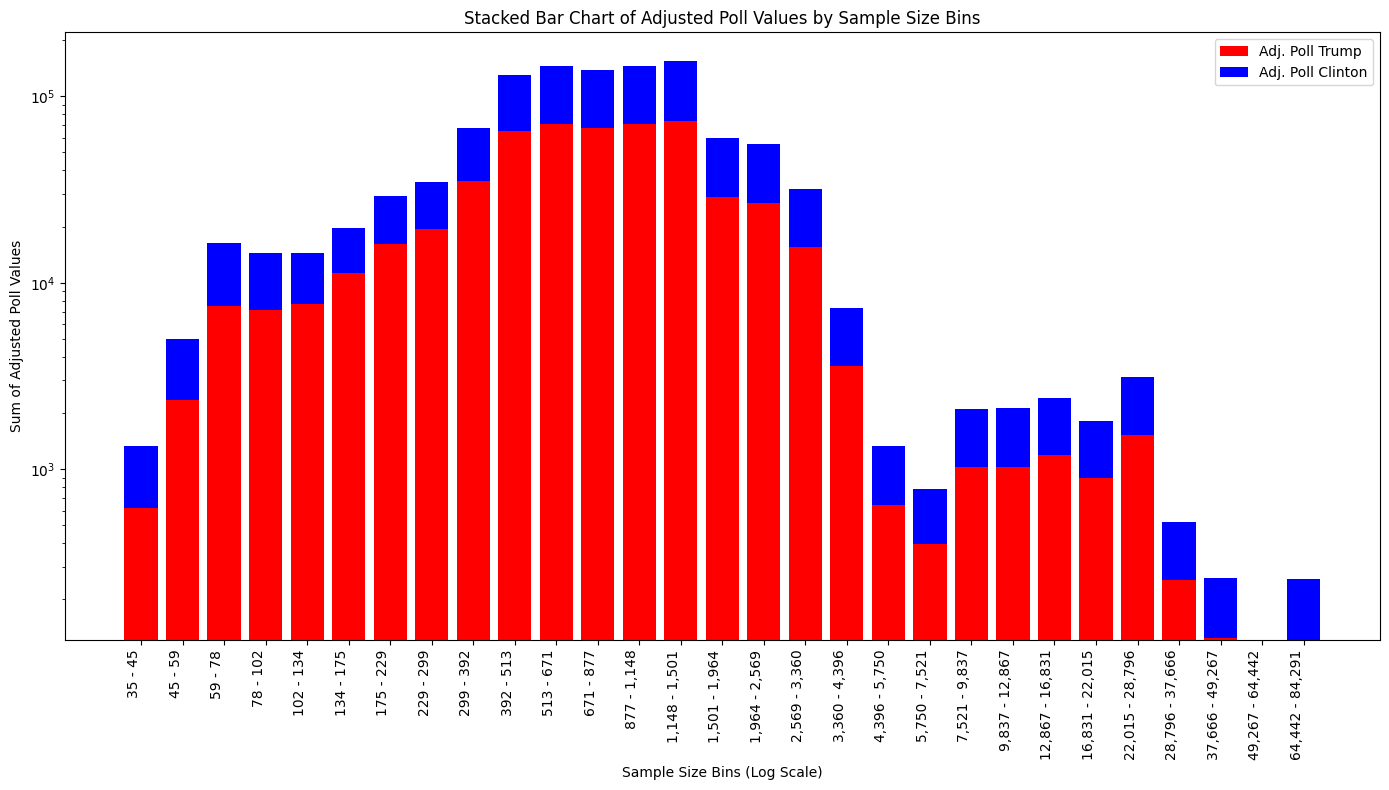

In [206]:
# Increase number of bins for better granularity
num_bins = 30  # Adjust this number to have more or fewer bins

# Calculate bins with logarithmic scale
bins = np.logspace(np.log10(df['samplesize'].min()), np.log10(df['samplesize'].max()), num=num_bins)

# Bin the samplesize into logarithmic bins
df['size_bin'] = pd.cut(df['samplesize'], bins=bins)

# Aggregate data by bins
bin_aggregated = df.groupby('size_bin').agg({
    'samplesize': 'count',  # Number of samples in each bin
    'adjpoll_trump': 'sum',  # Sum of adjpoll_trump values
    'adjpoll_clinton': 'sum'  # Sum of adjpoll_clinton values
}).reset_index()

# Define bin labels for better readability
bin_labels = [f'{int(left):,} - {int(right):,}' for left, right in zip(bins[:-1], bins[1:])]
bin_aggregated['size_bin_label'] = bin_labels

# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))  # Adjust the figure size as needed

# Stacked bar for adjpoll_trump and adjpoll_clinton
plt.bar(bin_aggregated['size_bin_label'], bin_aggregated['adjpoll_trump'], color='red', label='Adj. Poll Trump')
plt.bar(bin_aggregated['size_bin_label'], bin_aggregated['adjpoll_clinton'], 
        bottom=bin_aggregated['adjpoll_trump'], color='blue', label='Adj. Poll Clinton')

# Add labels and title
plt.xlabel('Sample Size Bins (Log Scale)')
plt.ylabel('Sum of Adjusted Poll Values')
plt.title('Stacked Bar Chart of Adjusted Poll Values by Sample Size Bins')

# Add a legend to indicate the data series
plt.legend()

# Customize the y-axis with logarithmic scale
plt.yscale('log')  # Use logarithmic scale for y-axis
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels

plt.show()

In [207]:
# Display summary to understand the data distribution
bin_summary = df.groupby('size_bin').agg({
    'samplesize': 'count',
    'adjpoll_trump': 'sum',
    'adjpoll_clinton': 'sum'
}).reset_index()

print(bin_summary)

                  size_bin  samplesize  adjpoll_trump  adjpoll_clinton
0            (35.0, 45.78]          15     615.880860        710.17289
1          (45.78, 59.881]          57    2338.423700       2672.46018
2         (59.881, 78.325]         192    7455.012830       8880.86403
3         (78.325, 102.45]         177    7096.319780       7382.47802
4        (102.45, 134.006]         174    7692.999710       6676.05674
5       (134.006, 175.281]         237   11314.823890       8450.09867
6       (175.281, 229.269]         348   16047.208968      13035.70425
7       (229.269, 299.886]         411   19321.308080      15252.87496
8       (299.886, 392.254]         771   35227.539023      32055.85058
9       (392.254, 513.071]        1518   64957.428207      64814.69782
10      (513.071, 671.102]        1692   71140.119277      74161.02042
11      (671.102, 877.808]        1602   67655.369970      71241.71574
12     (877.808, 1148.182]        1683   71443.597700      74326.29687
13    

/var/folders/5q/z1l12s4n7y1bxgmlhw1vkr7c0000gp/T/ipykernel_56963/3459941243.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_summary = df.groupby('size_bin').agg({


In [208]:
# Display a descriptive summary of the adjusted poll values for Trump and Clinton

trump_summary = final_filtered_df['adjpoll_trump'].describe()
clinton_summary = final_filtered_df['adjpoll_clinton'].describe()

print("Summary for Adj. Poll Trump:")
print(trump_summary)
print("\nSummary for Adj. Poll Clinton:")
print(clinton_summary)


Summary for Adj. Poll Trump:
count    11337.000000
mean        42.614681
std          7.228398
min          4.372936
25%         38.064410
50%         42.618010
75%         46.656760
max         72.437390
Name: adjpoll_trump, dtype: float64

Summary for Adj. Poll Clinton:
count    11337.000000
mean        43.158280
std          7.374218
min         17.064950
25%         39.653310
50%         43.877530
75%         47.026120
max         86.772180
Name: adjpoll_clinton, dtype: float64


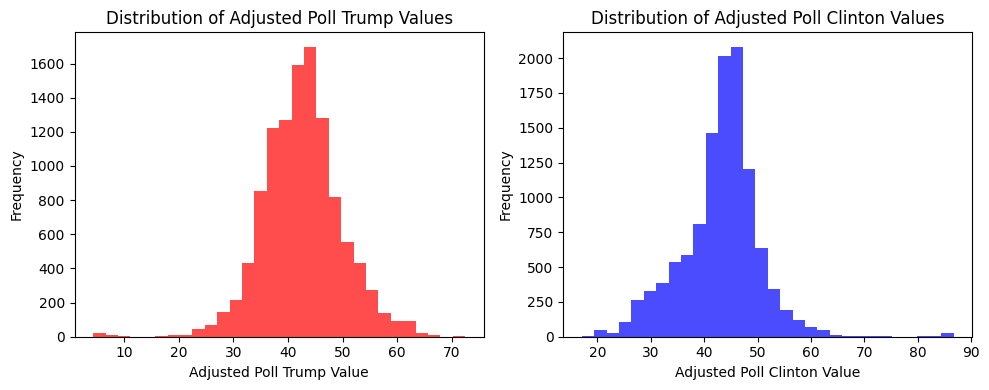

In [238]:
# Histograms for both adjusted poll values
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(final_filtered_df['adjpoll_trump'], bins=30, color='red', alpha=0.7)
plt.title('Distribution of Adjusted Poll Trump Values')
plt.xlabel('Adjusted Poll Trump Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(final_filtered_df['adjpoll_clinton'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Adjusted Poll Clinton Values')
plt.xlabel('Adjusted Poll Clinton Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

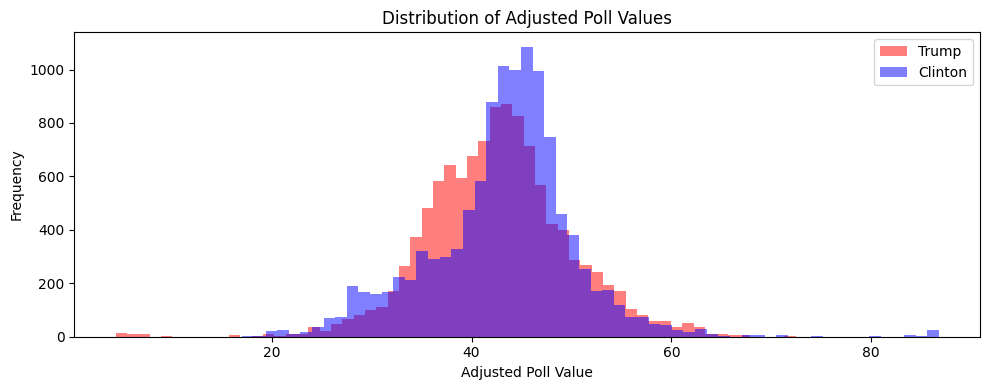

In [239]:
plt.figure(figsize=(10, 4))

# Histogram for Adjusted Poll Trump Values
plt.hist(final_filtered_df['adjpoll_trump'], bins=60, color='red', alpha=0.5, label='Trump')

# Histogram for Adjusted Poll Clinton Values
plt.hist(final_filtered_df['adjpoll_clinton'], bins=60, color='blue', alpha=0.5, label='Clinton')

# Add titles and labels
plt.title('Distribution of Adjusted Poll Values')
plt.xlabel('Adjusted Poll Value')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Adjust layout to fit labels
plt.tight_layout()

# Show plot
plt.show()


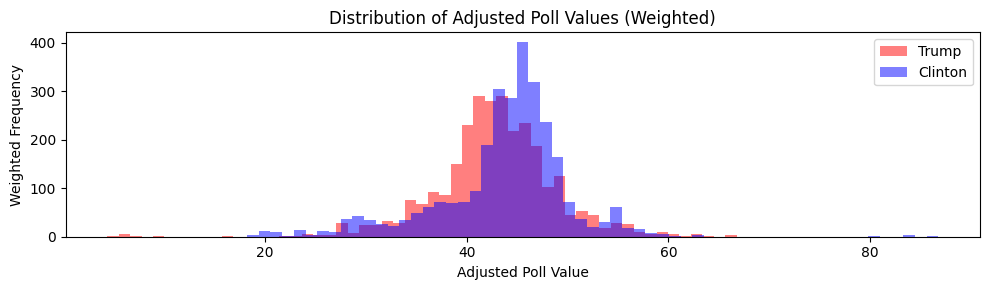

In [240]:
# Calculate the weighted histogram for Adjusted Poll Trump Values
hist_trump, bins_trump = np.histogram(
    final_filtered_df['adjpoll_trump'],
    bins=60,
    weights=final_filtered_df['poll_wt']
)

# Calculate the weighted histogram for Adjusted Poll Clinton Values
hist_clinton, bins_clinton = np.histogram(
    final_filtered_df['adjpoll_clinton'],
    bins=60,
    weights=final_filtered_df['poll_wt']
)

# Plot the histograms
plt.figure(figsize=(10, 3))

# Plot for Adjusted Poll Trump Values
plt.bar(bins_trump[:-1], hist_trump, width=np.diff(bins_trump), color='red', alpha=0.5, label='Trump', align='edge')

# Plot for Adjusted Poll Clinton Values
plt.bar(bins_clinton[:-1], hist_clinton, width=np.diff(bins_clinton), color='blue', alpha=0.5, label='Clinton', align='edge')

# Add titles and labels
plt.title('Distribution of Adjusted Poll Values (Weighted)')
plt.xlabel('Adjusted Poll Value')
plt.ylabel('Weighted Frequency')

# Add legend
plt.legend()

# Adjust layout to fit labels
plt.tight_layout()

# Show plot
plt.show()

In [212]:
final_filtered_df.head()

,pollster,grade,question_id,samplesize,state,poll_wt,adjpoll_trump,adjpoll_clinton
459,YouGov,B,76299,84292.0,U.S.,0.718942,41.38541,43.74084
8875,YouGov,B,76299,84292.0,U.S.,0.718942,41.37994,43.75867
4667,YouGov,B,76299,84292.0,U.S.,0.718942,41.37716,43.68467
8467,SurveyMonkey,C-,76043,70194.0,U.S.,3.020698,40.48252,45.60361
4259,SurveyMonkey,C-,76043,70194.0,U.S.,3.020698,40.41574,45.61232


In [217]:
states = final_filtered_df['state'].unique()
states

array(['U.S.', 'California', 'Texas', 'Florida', 'New York',
       'Pennsylvania', 'Ohio', 'Illinois', 'Michigan', 'North Carolina',
       'Georgia', 'Colorado', 'Nevada', 'Virginia', 'Wisconsin',
       'Arizona', 'Maryland', 'New Jersey', 'Indiana', 'South Carolina',
       'Minnesota', 'Maine', 'Washington', 'Oregon', 'Massachusetts',
       'Missouri', 'Iowa', 'Kansas', 'New Mexico', 'Tennessee', 'Utah',
       'New Hampshire', 'Alabama', 'Connecticut', 'Louisiana', 'Kentucky',
       'Oklahoma', 'West Virginia', 'Mississippi', 'Vermont', 'Idaho',
       'Montana', 'Alaska', 'Nebraska', 'Maine CD-2', 'Arkansas',
       'South Dakota', 'Rhode Island', 'Wyoming', 'Delaware',
       'Nebraska CD-1', 'Nebraska CD-3', 'Nebraska CD-2',
       'District of Columbia', 'North Dakota', 'Hawaii', 'Maine CD-1'],
      dtype=object)

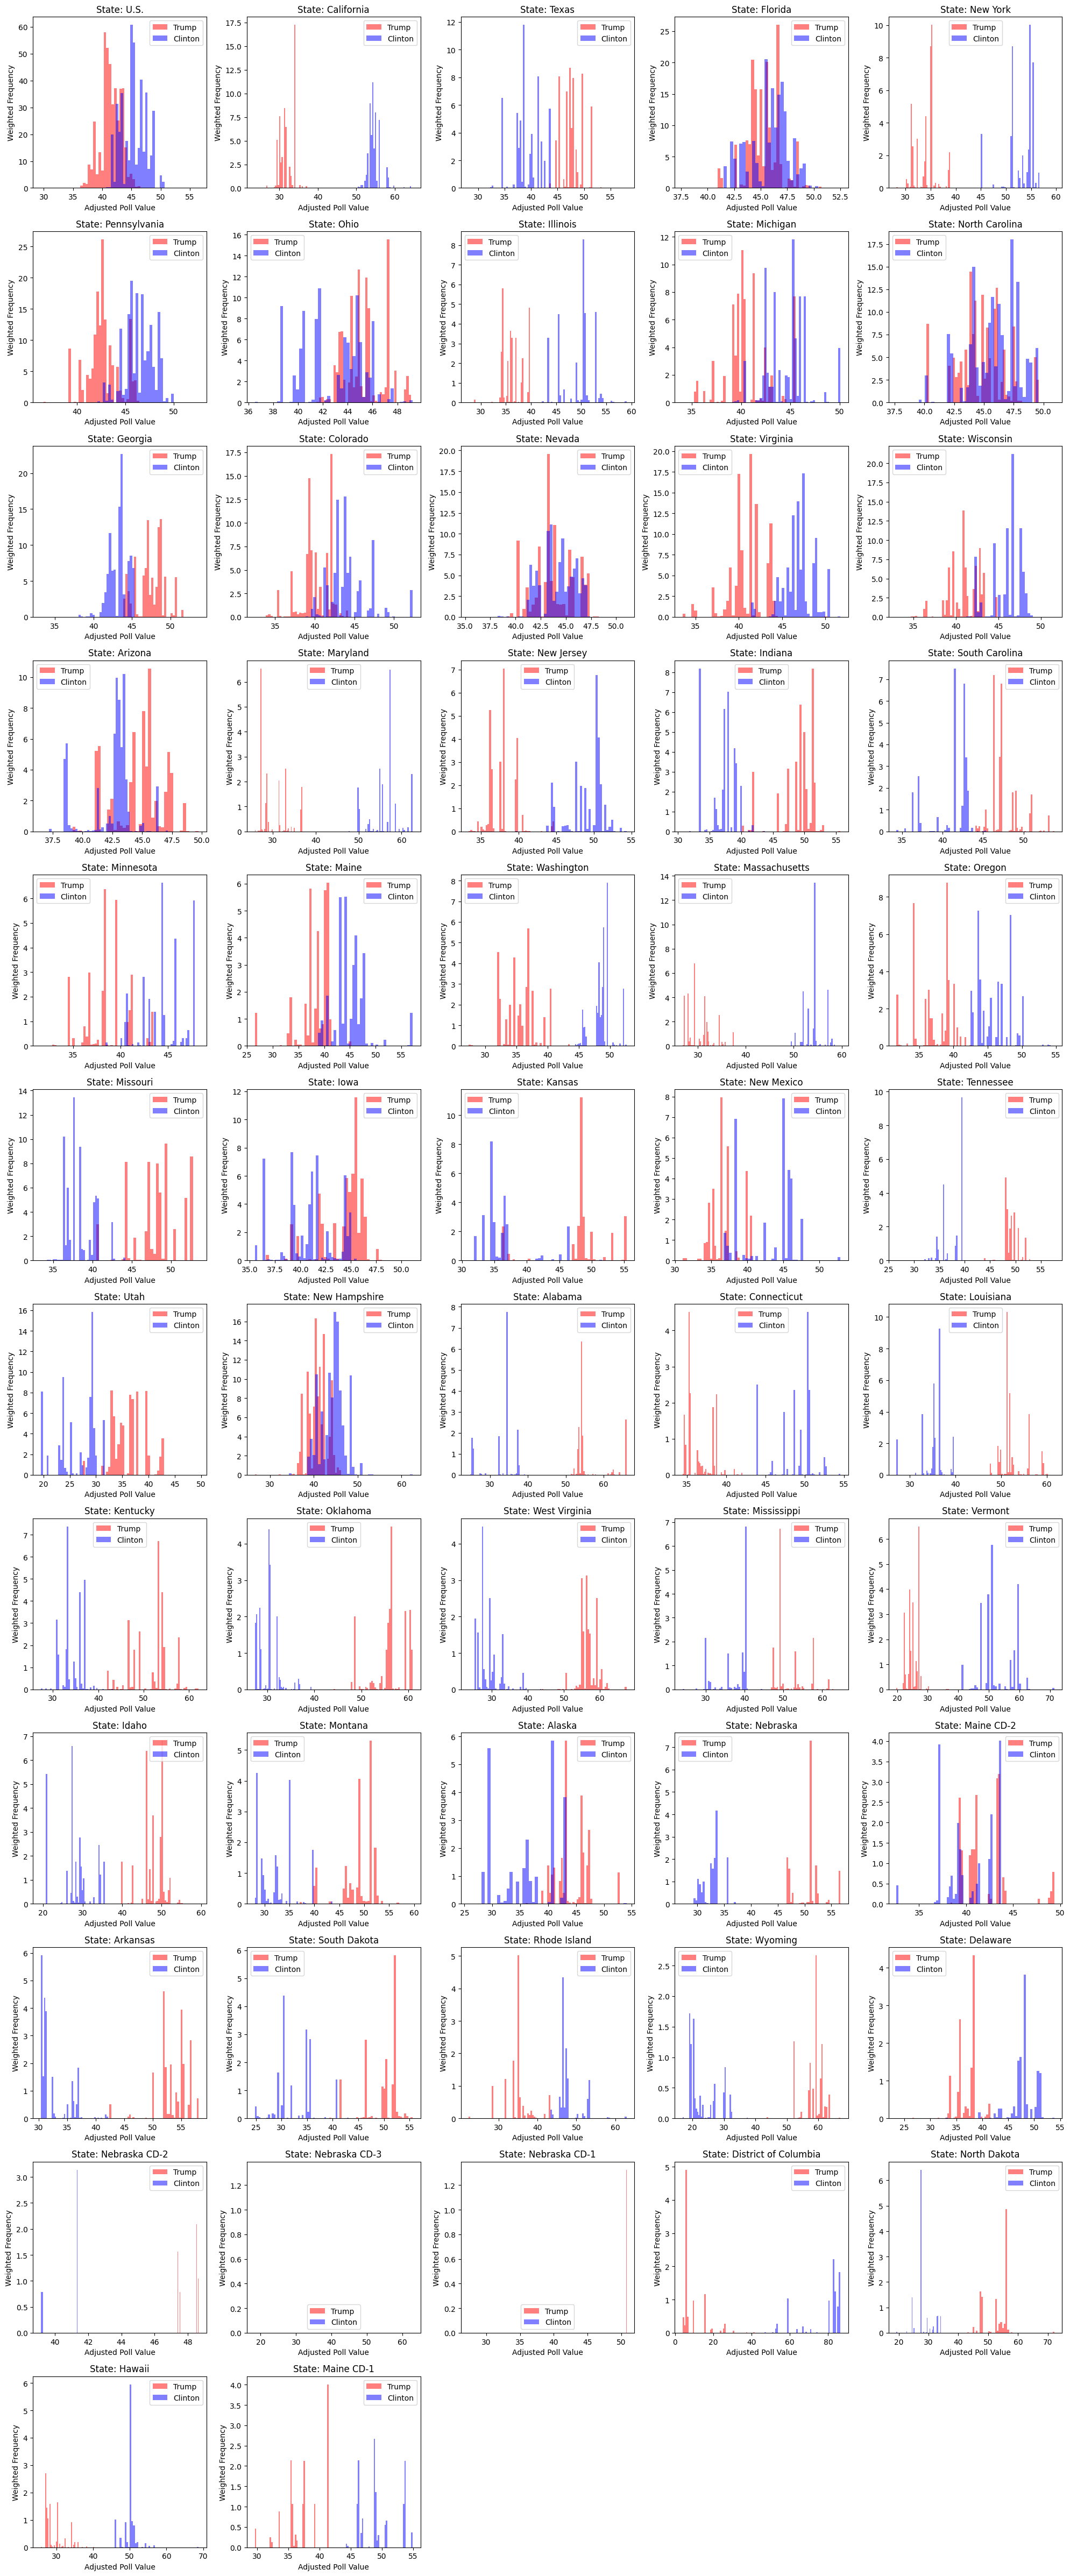

In [241]:
# Get unique states
states = final_filtered_df['state'].unique()

# Set up the figure with subplots
num_states = len(states)
num_cols = 5  # Number of columns for the subplot grid
num_rows = (num_states + num_cols - 1) // num_cols  # Calculate number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for i, state in enumerate(states):
    # Filter data for the current state
    state_data = final_filtered_df[final_filtered_df['state'] == state]
    
    # Calculate weighted histograms
    hist_trump, bins_trump = np.histogram(
        state_data['adjpoll_trump'],
        bins=50,
        weights=state_data['poll_wt']
    )
    
    hist_clinton, bins_clinton = np.histogram(
        state_data['adjpoll_clinton'],
        bins=50,
        weights=state_data['poll_wt']
    )
    
    # Plot histograms for Trump and Clinton in each subplot
    axes[i].bar(bins_trump[:-1], hist_trump, width=np.diff(bins_trump), color='red', alpha=0.5, label='Trump')
    axes[i].bar(bins_clinton[:-1], hist_clinton, width=np.diff(bins_clinton), color='blue', alpha=0.5, label='Clinton')
    
    # Set title and labels
    axes[i].set_title(f'State: {state}')
    axes[i].set_xlabel('Adjusted Poll Value')
    axes[i].set_ylabel('Weighted Frequency')
    axes[i].legend()

# Hide any unused subplots
for j in range(num_states, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()